In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import statsmodels.api as sm
import arch
import yfinance as yf

#### 株式市場

In [2]:
stock_code = "^N225"
nikkei = yf.download(stock_code, start="1960-01-01", end="2023-05-31")
nikkei

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,0
1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,0
1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,0
1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,0
1965-01-12,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039,0
...,...,...,...,...,...,...
2023-05-22,30735.710938,31086.820312,30689.269531,31086.820312,31086.820312,75400000
2023-05-23,31245.720703,31352.529297,30828.730469,30957.769531,30957.769531,92200000
2023-05-24,30728.689453,30856.919922,30566.830078,30682.679688,30682.679688,81700000


In [3]:
nikkei['Adj Close']

Date
1965-01-05     1257.719971
1965-01-06     1263.989990
1965-01-07     1274.270020
1965-01-08     1286.430054
1965-01-12     1288.540039
                  ...     
2023-05-22    31086.820312
2023-05-23    30957.769531
2023-05-24    30682.679688
2023-05-25    30801.130859
2023-05-26    30916.310547
Name: Adj Close, Length: 14359, dtype: float64

Text(0.5, 1.0, 'Nikkei 225 Index')

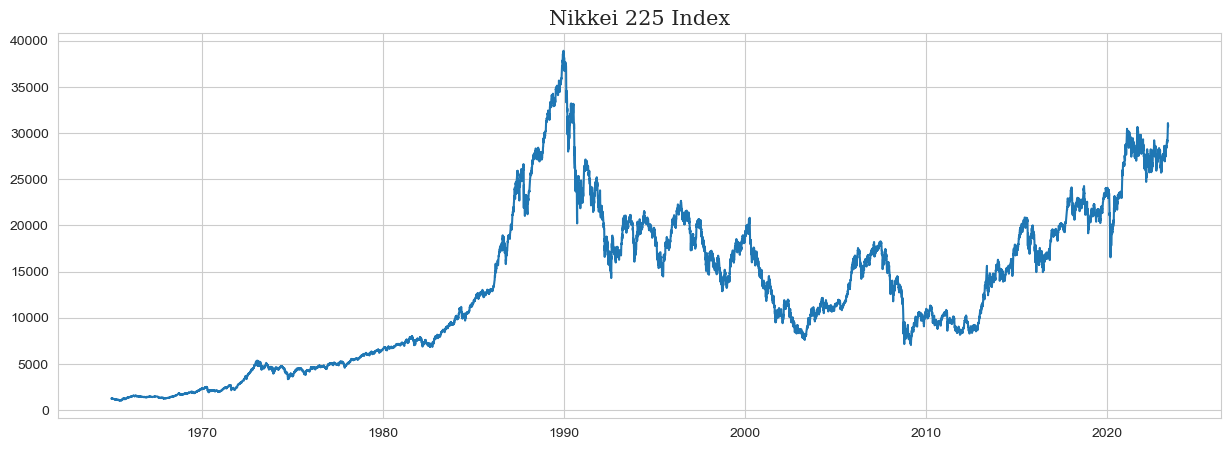

In [4]:
plt.figure(figsize = (15,5))
plt.plot(nikkei['Adj Close'])
plt.title('Nikkei 225 Index', fontfamily = 'Serif', fontsize = 15)

In [5]:
stock_code = "^N225"
nikkei5 = yf.download(stock_code, start="2019-01-01", end="2023-05-31")
nikkei5

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-04,19655.130859,19692.580078,19241.369141,19561.960938,19561.960938,91600000
2019-01-07,19944.609375,20266.220703,19920.800781,20038.970703,20038.970703,81500000
2019-01-08,20224.669922,20347.919922,20106.359375,20204.039062,20204.039062,86400000
2019-01-09,20366.300781,20494.349609,20331.199219,20427.060547,20427.060547,72800000
2019-01-10,20270.880859,20345.919922,20101.929688,20163.800781,20163.800781,73700000
...,...,...,...,...,...,...
2023-05-22,30735.710938,31086.820312,30689.269531,31086.820312,31086.820312,75400000
2023-05-23,31245.720703,31352.529297,30828.730469,30957.769531,30957.769531,92200000
2023-05-24,30728.689453,30856.919922,30566.830078,30682.679688,30682.679688,81700000


Text(0.5, 1.0, 'Nikkei 225 Index')

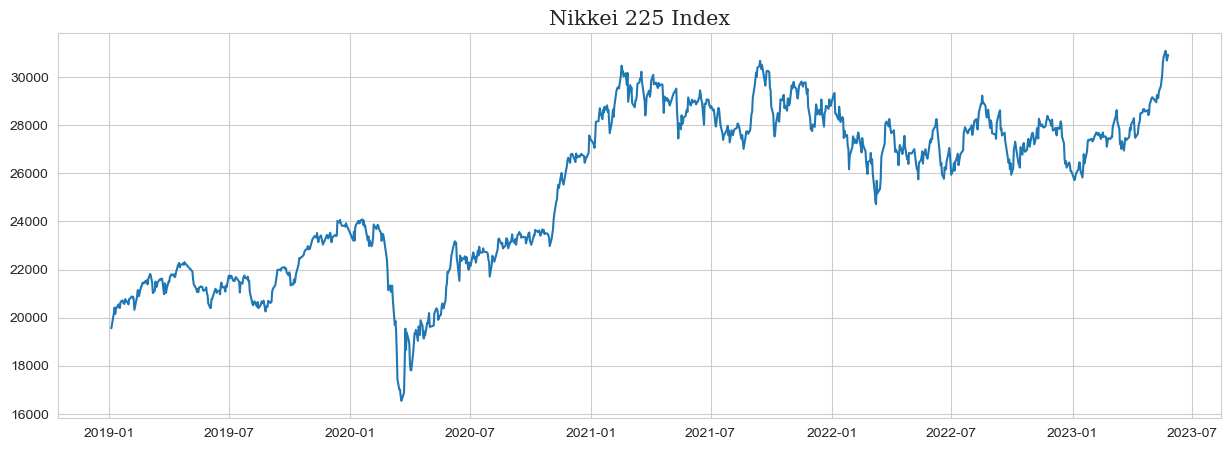

In [6]:
plt.figure(figsize = (15,5))
plt.plot(nikkei5['Adj Close'])
plt.title('Nikkei 225 Index', fontfamily = 'Serif', fontsize = 15)

#### 実質GDP増加率

In [7]:
gdp = pd.read_csv('./Data/GDPrate.csv', index_col = 2)
gdp = gdp.Value.astype(float)

In [8]:
gdp.index = pd.date_range(start = '1980-04-01', end = '2022-12-31', freq = 'Q')
gdp

1980-06-30   -0.5
1980-09-30    2.2
1980-12-31    2.1
1981-03-31    0.6
1981-06-30    1.2
             ... 
2021-12-31    1.1
2022-03-31   -0.5
2022-06-30    1.2
2022-09-30   -0.3
2022-12-31    0.0
Freq: Q-DEC, Name: Value, Length: 171, dtype: float64

Text(0.5, 1.0, 'real GDP rate')

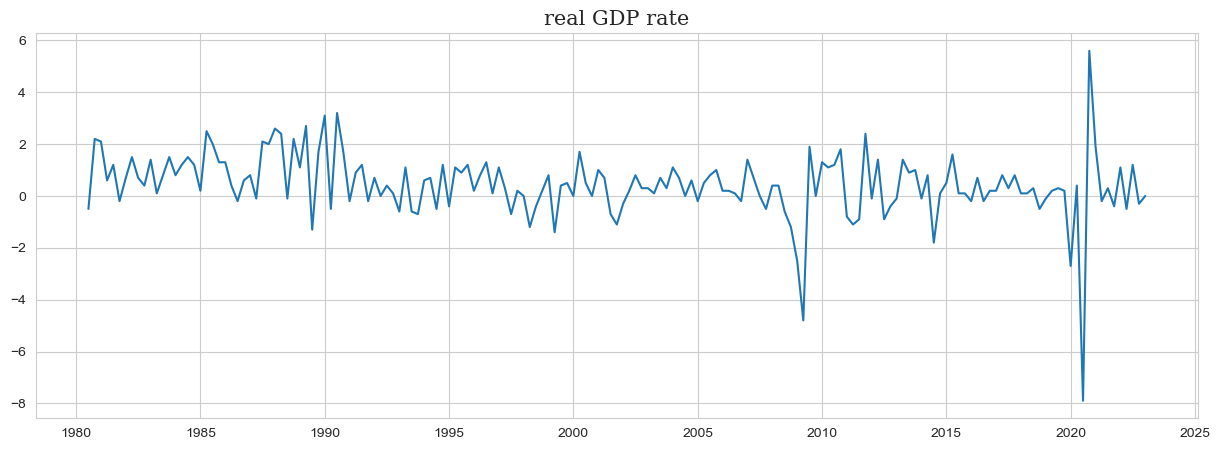

In [9]:
plt.figure(figsize = (15,5))
plt.plot(gdp)
plt.title('real GDP rate', fontfamily = 'Serif', fontsize = 15)

Text(0.5, 1.0, 'real GDP index')

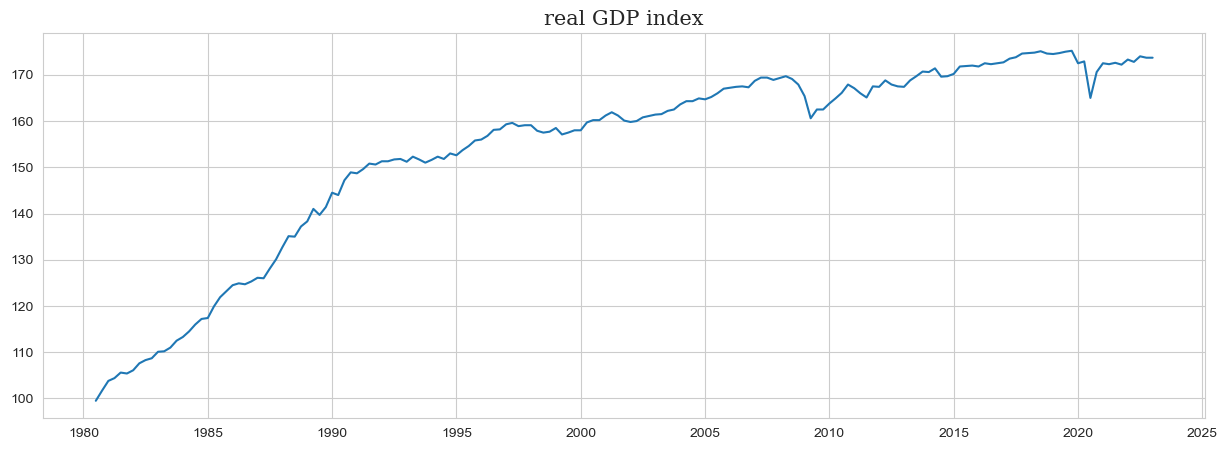

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(gdp.cumsum() + 100)
plt.title('real GDP index', fontfamily='Serif', fontsize=15)

#### 失業率

In [11]:
unemploy = pd.read_csv('./Data/unemployment.csv', index_col = 2)
unemploy = unemploy.Value.astype(float) * 0.01
unemploy.index = pd.date_range(start = '1953-01-01', end = '2023-03-31', freq = 'M')

In [12]:
unemploy

1953-01-31    0.019
1953-02-28    0.019
1953-03-31    0.018
1953-04-30    0.020
1953-05-31    0.020
              ...  
2022-11-30    0.025
2022-12-31    0.025
2023-01-31    0.024
2023-02-28    0.026
2023-03-31    0.028
Freq: M, Name: Value, Length: 843, dtype: float64

Text(0.5, 1.0, 'Unemployment Rate')

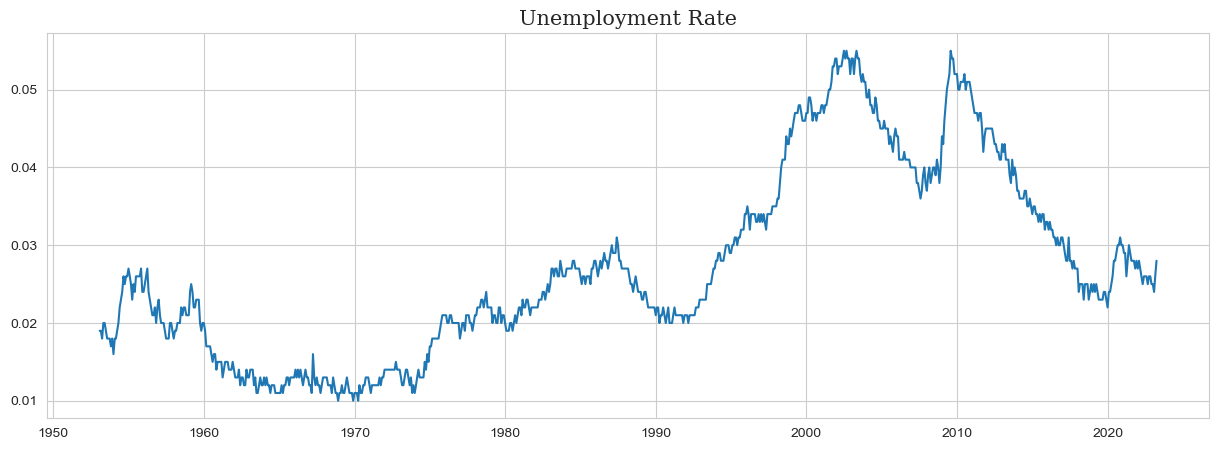

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(unemploy)
plt.title('Unemployment Rate', fontfamily='Serif', fontsize=15)

#### 金利

In [14]:
interest = pd.read_csv('./Data/interest.csv', index_col = 2)
interest = interest.Value.astype(float) * 0.01

In [15]:
interest.index = pd.to_datetime(interest.index)

In [16]:
interest

DateTime
1972-10-02    0.0425
1972-11-03    0.0425
1972-12-01    0.0425
1973-01-05    0.0425
1973-02-02    0.0425
               ...  
2022-12-20   -0.0010
2023-01-18   -0.0010
2023-02-28   -0.0010
2023-03-10   -0.0010
2023-04-28   -0.0010
Name: Value, Length: 655, dtype: float64

Text(0.5, 1.0, 'Interest Rate')

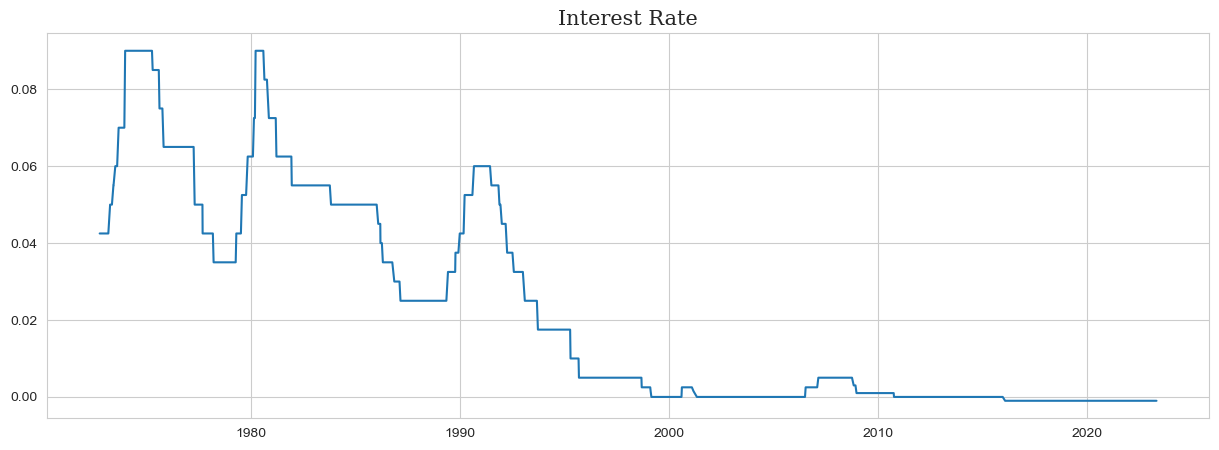

In [17]:
plt.figure(figsize=(15, 5))
plt.plot(interest)
plt.title('Interest Rate', fontfamily='Serif', fontsize=15)

#### 物価上昇率

In [18]:
inflation = pd.read_csv('./Data/inflation.csv', index_col = 2)
inflation = inflation.Value.astype(float) * 0.01

In [19]:
inflation.index = pd.to_datetime(inflation.index)

Text(0.5, 1.0, 'Inflation Rate')

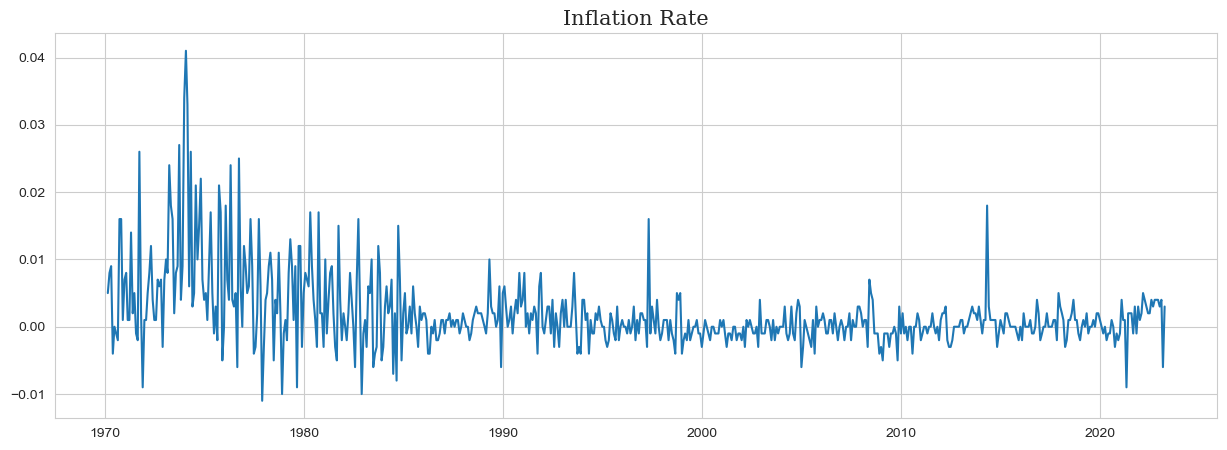

In [20]:
plt.figure(figsize=(15, 5))
plt.plot(inflation)
plt.title('Inflation Rate', fontfamily='Serif', fontsize=15)

In [21]:
inflation.cumsum()['2015-01-31']

1.1649999999999991

Text(0.5, 1.0, 'Inflation Index')

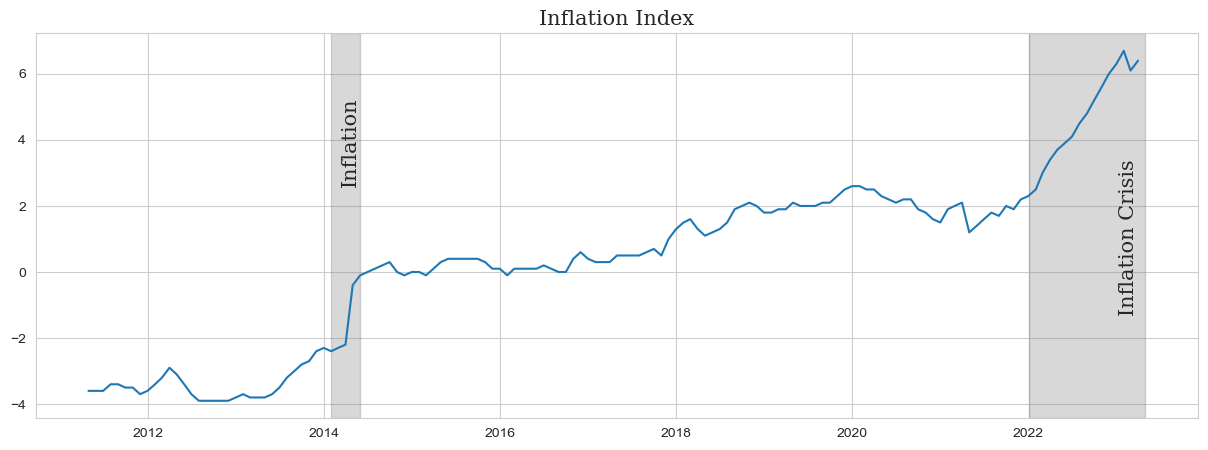

In [22]:
plt.figure(figsize=(15, 5))
plt.plot(((inflation.cumsum() + 1) * 100 - (inflation.cumsum()['2015-01-31']+1)*100)[-144:])
plt.axvspan('2014-02-01', '2014-05-31', color = 'gray', alpha = 0.3)
plt.axvspan('2022-01-01', '2023-04-30', color = 'gray', alpha = 0.3)
plt.text(16140, 2.7, 'Inflation', ha = 'left', fontsize = 15, fontfamily = 'Serif', rotation = 90)
plt.text(19370, -1.2, 'Inflation Crisis', ha = 'left', fontsize = 15, fontfamily = 'Serif', rotation = 90)
plt.title('Inflation Index', fontfamily='Serif', fontsize=15)

### 時系列分析
まず、株式市場の分析する。

In [23]:
nikkei_ret = np.log(nikkei['Adj Close']) - np.log(nikkei['Adj Close'].shift(1))
nikkei_ret = nikkei_ret.dropna()
nikkei_ret

Date
1965-01-06    0.004973
1965-01-07    0.008100
1965-01-08    0.009498
1965-01-12    0.001639
1965-01-13   -0.005346
                ...   
2023-05-22    0.008998
2023-05-23   -0.004160
2023-05-24   -0.008926
2023-05-25    0.003853
2023-05-26    0.003732
Name: Adj Close, Length: 14358, dtype: float64

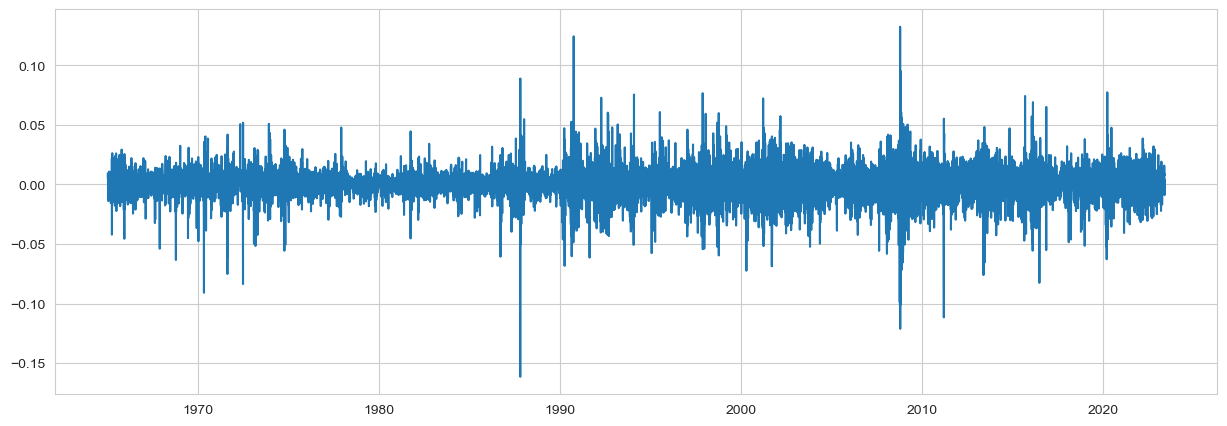

In [24]:
plt.figure(figsize = (15,5))
plt.plot(nikkei_ret)

/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1500x500 with 0 Axes>

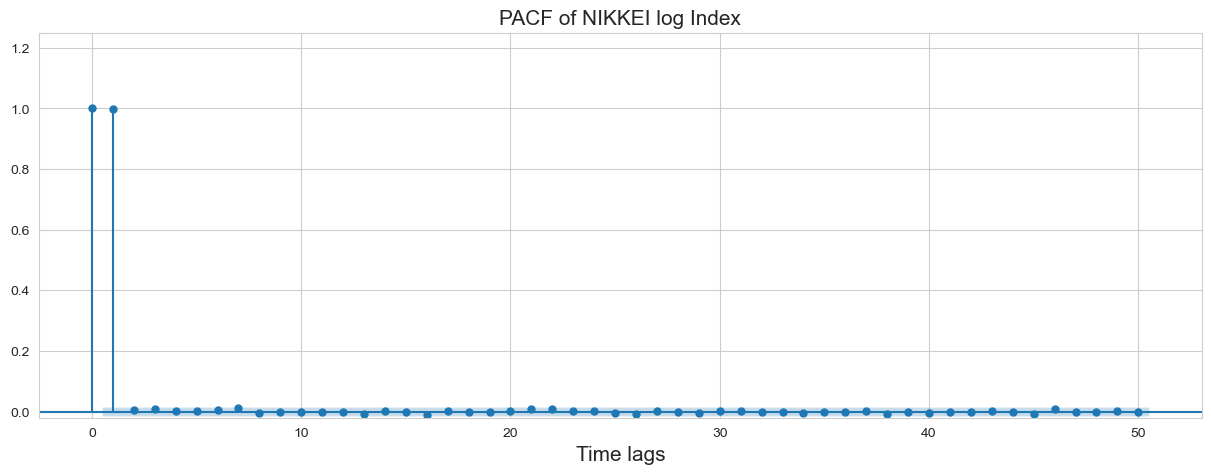

In [25]:
import statsmodels.tsa.stattools as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize = (15,5))
fig, ax = plt.subplots(figsize=(15, 5))
plot_pacf(np.log(nikkei['Adj Close']), auto_ylims = True, lags = 50, title = 'PACF of KOSPI log Index', ax = ax)
plt.xlabel('Time lags', fontsize = 15)
plt.title('PACF of NIKKEI log Index', fontsize = 15)
plt.show()

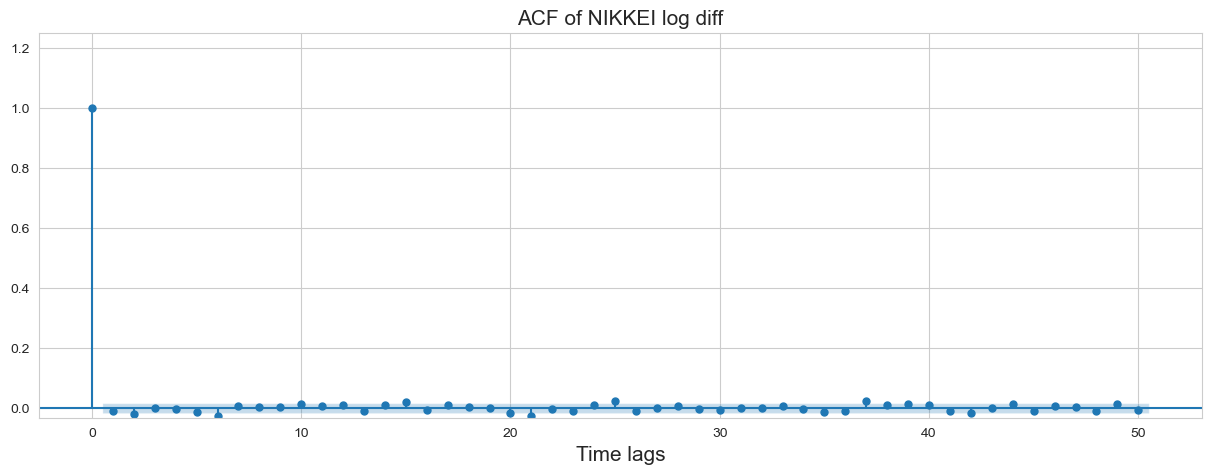

In [26]:
fig, ax = plt.subplots(figsize=(15, 5))
plot_acf(nikkei_ret, auto_ylims = True, lags = 50, title = 'ACF of KOSPI log Index' , ax = ax)
plt.xlabel('Time lags', fontsize = 15)
plt.title('ACF of NIKKEI log diff', fontsize = 15)
plt.show()

In [27]:
import statsmodels.api as sm
model = sm.tsa.ARIMA(nikkei['Adj Close'], order = (1,0,2), trend = 'c').fit(method = 'innovations_mle')
model.summary()

/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                14359
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -96585.603
Date:                Sat, 27 May 2023   AIC                         193181.206
Time:                        19:00:16   BIC                         193219.067
Sample:                             0   HQIC                        193193.795
                              - 14359                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.462e+04      0.183   7.98e+04      0.000    1.46e+04    1.46e+04
ar.L1          0.9998      0.000   5294.719      0.000       0.999       1.000
ma.L1         -0.0013      0.003     -0.384      0.701      -0.008       0.005
ma.L2         -0.0332      0.004     -7.447      0.000      -0.042      -0.024
sigma2      4.072e+04    154.007    264.418      0.000    4.04e+04     4.1e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            210276.29
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              34.03   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.24e+21. Standard errors may be unstable.
"""

失業率分析

<Figure size 1000x800 with 0 Axes>

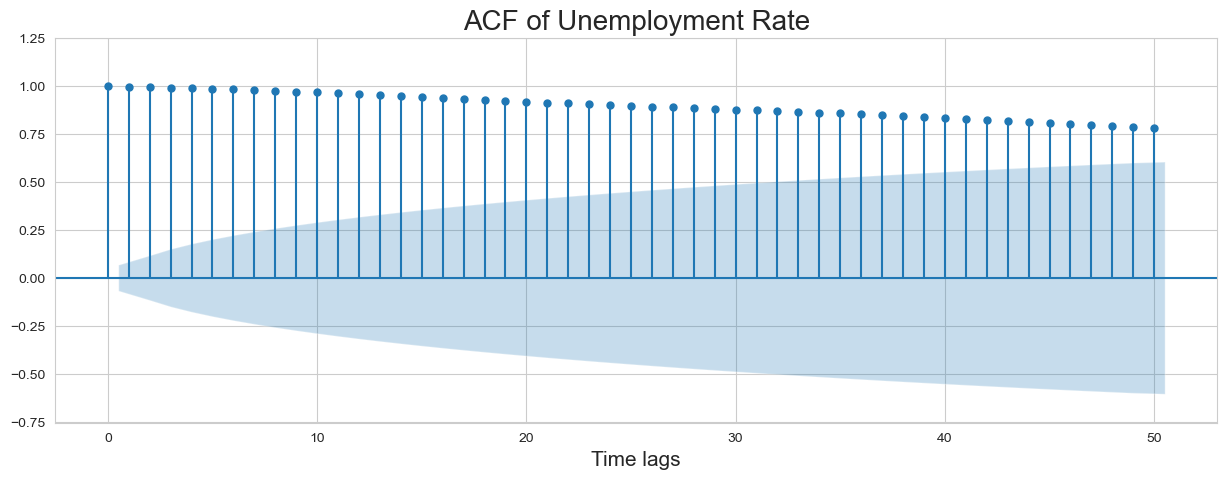

In [28]:
plt.figure(figsize = (10,8))
fig, ax = plt.subplots(figsize=(15, 5))
plot_acf(unemploy, auto_ylims = True, lags = 50, ax = ax)
plt.title('ACF of Unemployment Rate', fontsize = 20)
plt.xlabel('Time lags', fontsize = 15)
plt.show()

/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1000x800 with 0 Axes>

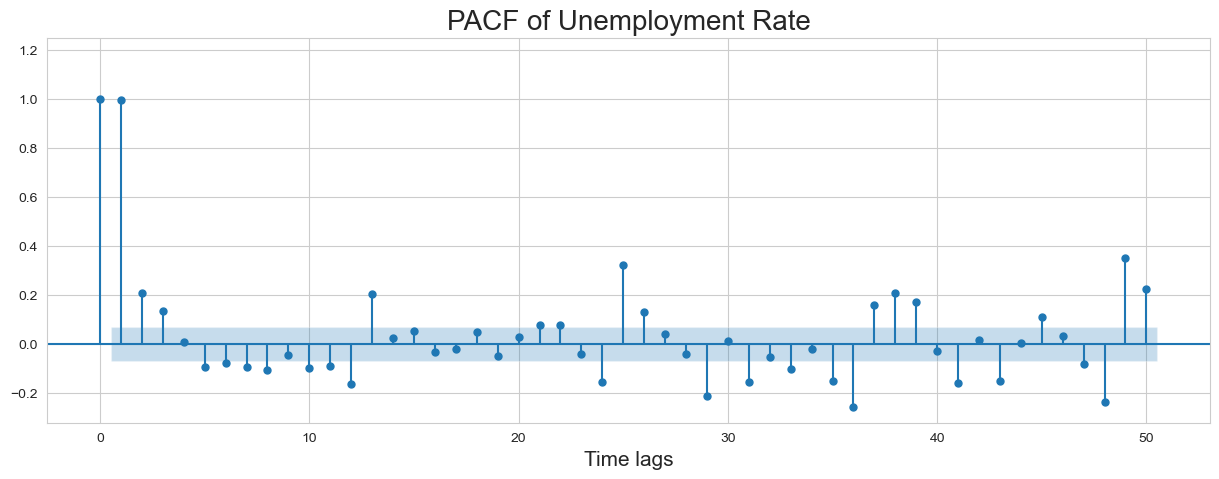

In [29]:
plt.figure(figsize = (10,8))
fig, ax = plt.subplots(figsize=(15, 5))
plot_pacf(unemploy, auto_ylims = True, lags = 50, ax = ax)
plt.xlabel('Time lags', fontsize = 15)
plt.title('PACF of Unemployment Rate', fontsize = 20)
plt.show()

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
import itertools
import statsmodels.api as sm

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

def sarimax_gridsearch(ts, pdq, pdqs, maxiter = 50, freq = 'M'):
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts, order = comb, seasonal_order = combs,
                                                enforce_stationarity=False, enforce_invertibility=False)
                output = mod.fit(maxiter = maxiter)
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}12 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue

    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])
    ans_df = ans_df.sort_values(by=['bic'], ascending=True)[0:5]

    return ans_df

#sarimax_gridsearch(unemploy, pdq, pdqs, freq='M')

In [32]:
model = SARIMAX(unemploy, order = (1, 1, 0),
                seasonal_order = (0, 0, 0, 12), enforce_stationarity = False,
                enforce_invertibility = False).fit()
model.summary()

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.42669D+00    |proj g|=  8.89928D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   8.899D+00  -5.427D+00
  F =  -5.4266862815138976     

ABNORMAL_TERMINATION_IN_LNSRCH                              


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                  843
Model:               SARIMAX(1, 1, 0)   Log Likelihood                4574.697
Date:                Sat, 27 May 2023   AIC                          -9145.393
Time:                        19:00:16   BIC                          -9135.924
Sample:                    01-31-1953   HQIC                         -9141.764
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1623      0.031     -5.225      0.000      -0.223      -0.101
sigma2      1.103e-06   4.56e-08     24.181      0.000    1.01e-06    1.19e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                23.91
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                             0.13
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
decomposition = sm.tsa.seasonal_decompose(unemploy, model = 'additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

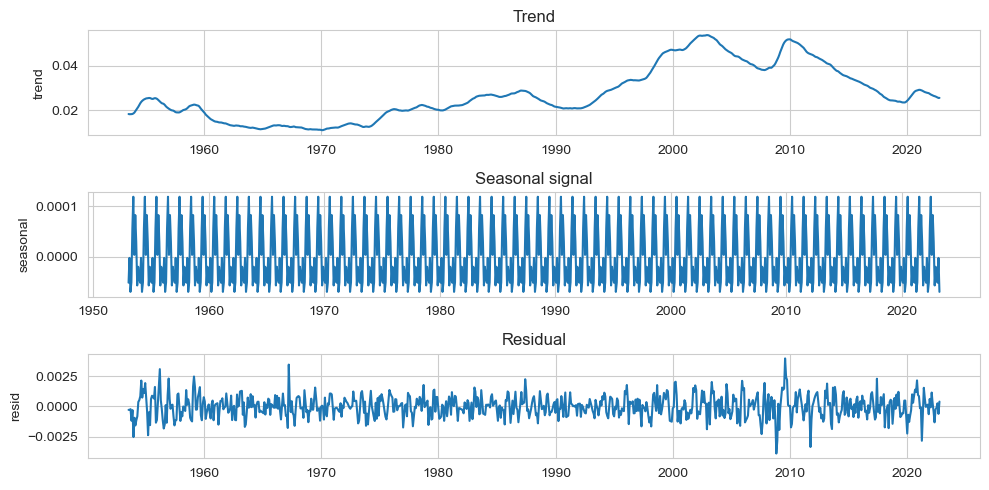

In [34]:
fig, axes = plt.subplots(3, 1, figsize=(10, 5))

sns.lineplot(data = trend, ax = axes[0])
axes[0].set_title('Trend')
sns.lineplot(data = seasonal, ax = axes[1])
axes[1].set_title('Seasonal signal')
sns.lineplot(data = residual, ax = axes[2])
axes[2].set_title('Residual')

plt.tight_layout()
plt.show()

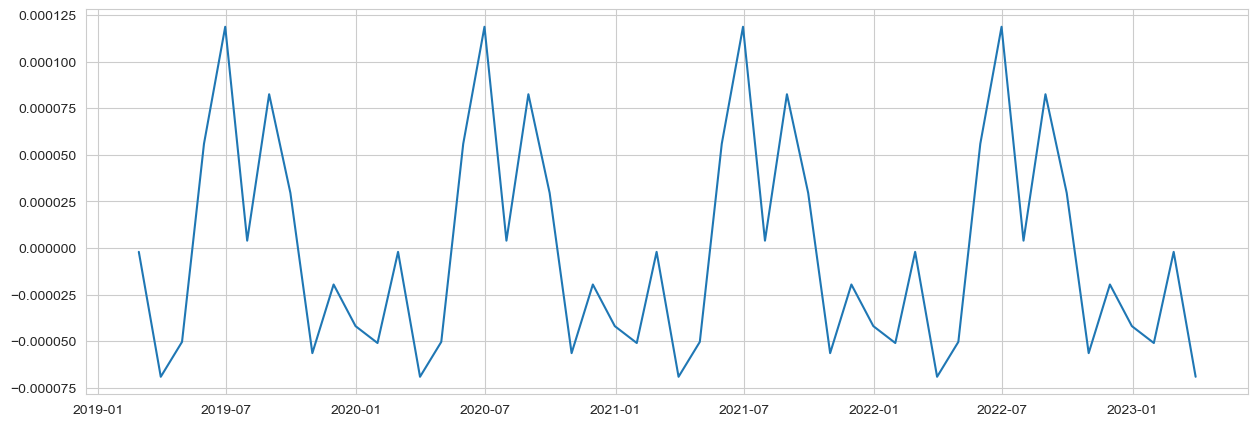

In [35]:
plt.figure(figsize = (15,5))
plt.plot(seasonal[-50:])

In [36]:
seasonal

1953-01-31   -0.000051
1953-02-28   -0.000002
1953-03-31   -0.000069
1953-04-30   -0.000050
1953-05-31    0.000056
                ...   
2022-11-30   -0.000020
2022-12-31   -0.000042
2023-01-31   -0.000051
2023-02-28   -0.000002
2023-03-31   -0.000069
Freq: M, Name: seasonal, Length: 843, dtype: float64

In [37]:
data = seasonal + residual.fillna(residual.mean())
#data = data.dropna()
data

1953-01-31   -0.000053
1953-02-28   -0.000004
1953-03-31   -0.000071
1953-04-30   -0.000053
1953-05-31    0.000054
                ...   
2022-11-30   -0.000022
2022-12-31   -0.000044
2023-01-31   -0.000053
2023-02-28   -0.000004
2023-03-31   -0.000071
Freq: M, Length: 843, dtype: float64